Step 1 : Loading the dataset

In [ ]:

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Loading the Titanic dataset
titanic_df = pd.read_csv("train.csv")



Step 2 : Data Cleaning

In [ ]:
# Checking for missing values
print(titanic_df.isnull().sum())

# Imputing missing values for Age with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Creating a new column 'CabinAvailable' to indicate whether Cabin information is available
titanic_df['CabinAvailable'] = np.where(titanic_df['Cabin'].isnull(), 0, 1)

# Handling missing values in Embarked by replacing them with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Dropping Cabin column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Checking if missing values still exist
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
CabinAvailable    0
dtype: int64


Convert Categorical Variables to Numerical

In [ ]:
# Converting 'Sex' and 'Embarked' to numerical values
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Feature Engineering

In [ ]:
# Creating a new feature 'FamilySize' as the sum of SibSp and Parch
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Creating a new feature 'IsAlone' (1 if alone, 0 otherwise)
titanic_df['IsAlone'] = np.where(titanic_df['FamilySize'] == 0, 1, 0)


Step 3: Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics of the dataset
print(titanic_df.describe())


       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  CabinAvailable  \
count  891.000000  891.000000  891.000000  891.000000      891.000000   
mean     0.523008    0.381594   32.204208    0.361392        0.228956   
std      1.102743    0.806057   49.693429    0.635673        0.420397   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25% 

Visualizing Distributions

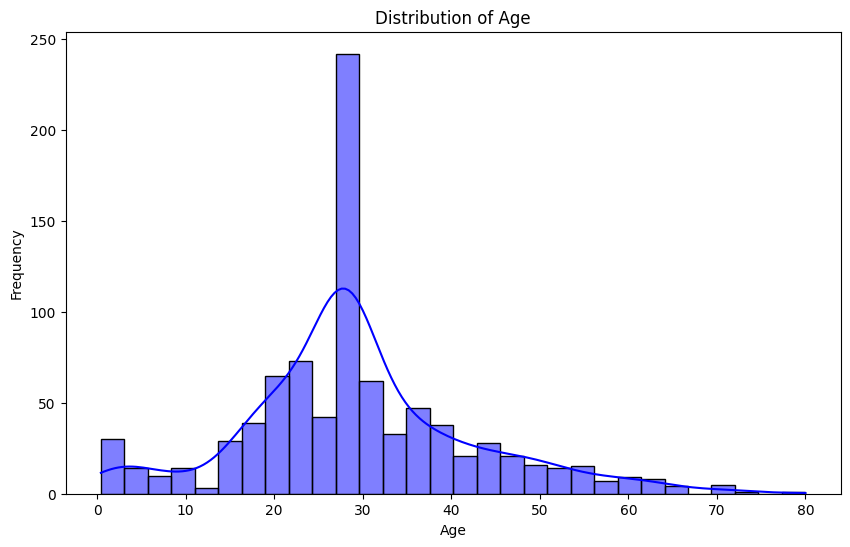

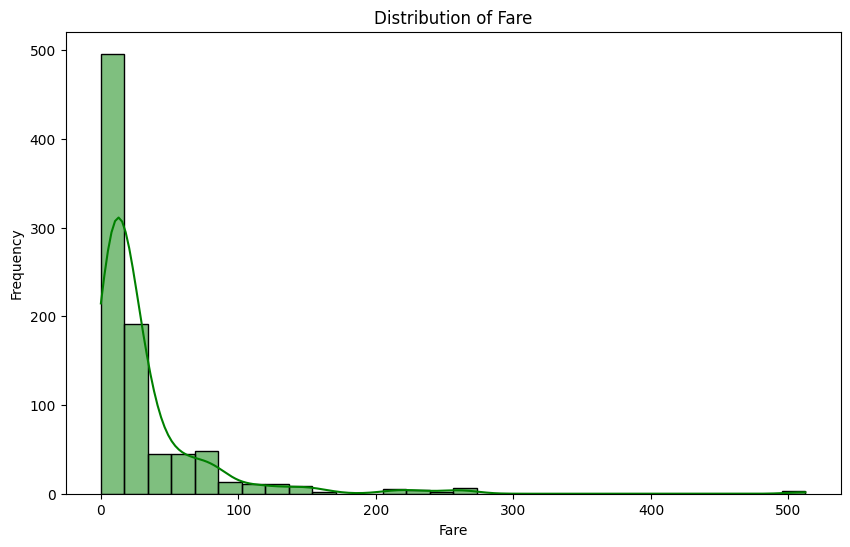

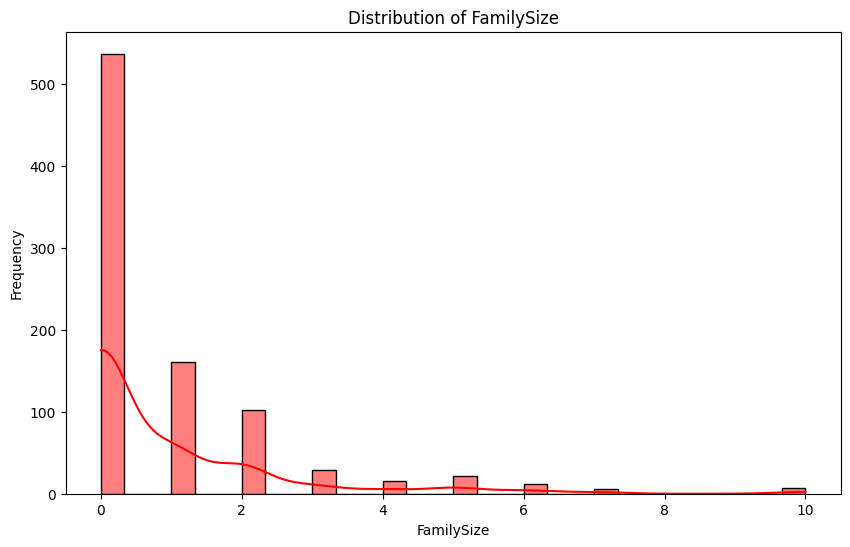

In [ ]:
# Distribution of Age
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Distribution of FamilySize
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['FamilySize'], bins=30, kde=True, color='red')
plt.title('Distribution of FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Frequency')
plt.show()


Exploring Relationships Between Variables

<ipython-input-16-aad826d15539>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='coolwarm')


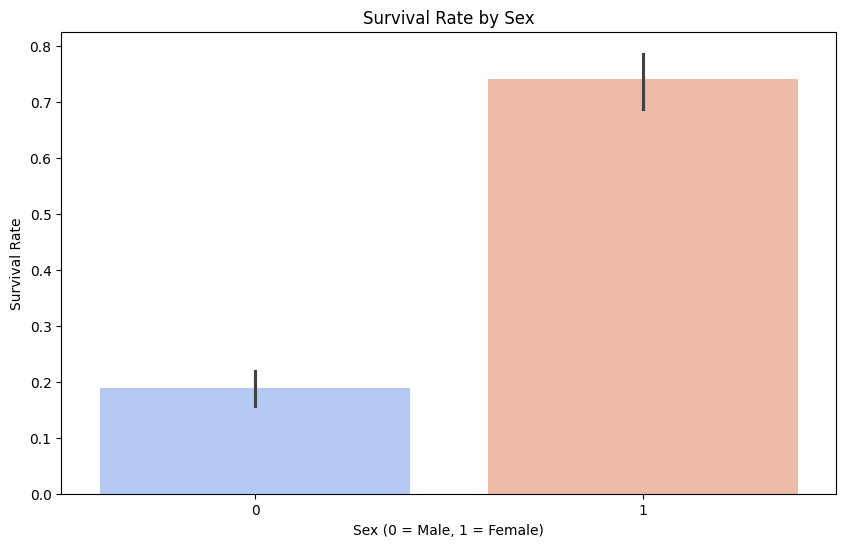

<ipython-input-16-aad826d15539>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='coolwarm')


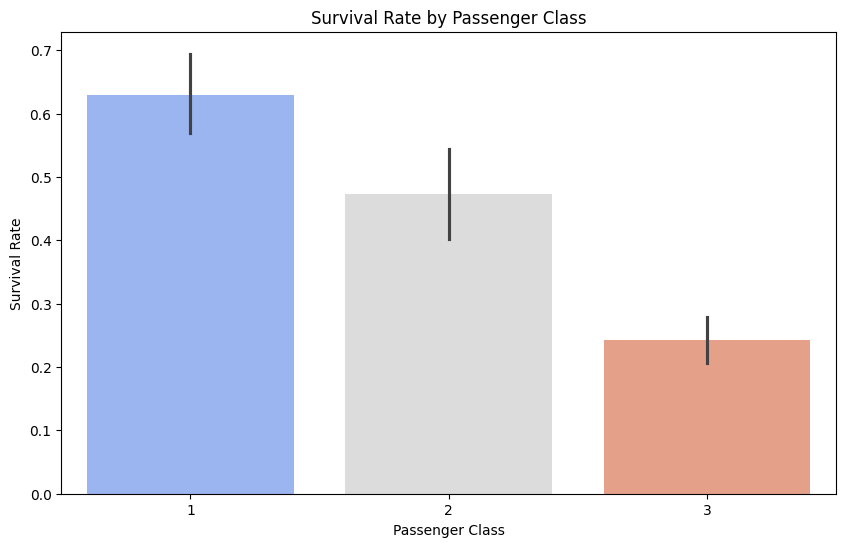

<ipython-input-16-aad826d15539>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='coolwarm')


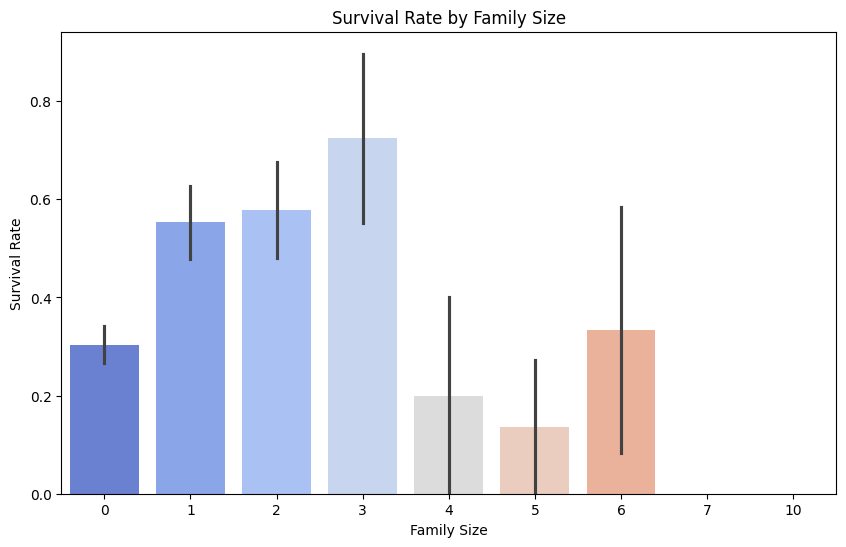

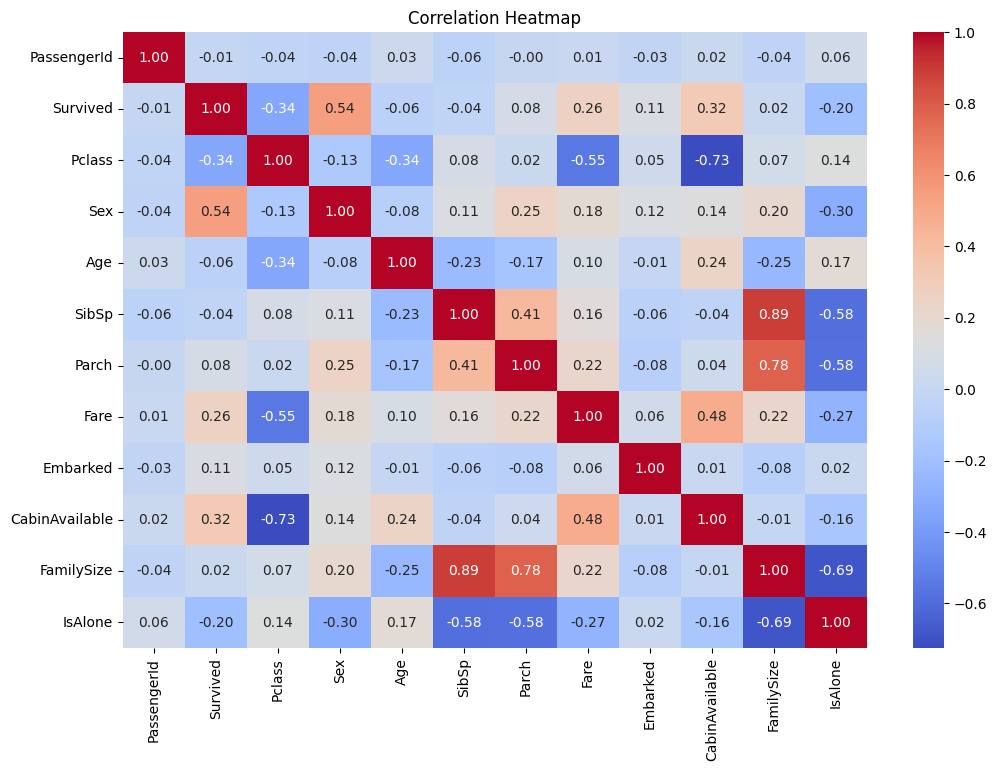

In [ ]:
# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Heatmap of correlations
numeric_columns = titanic_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Summary of Findings

Distribution of Age and Fare: The age distribution shows that most passengers are between 20 and 40 years old. Fare distribution is skewed with most passengers paying lower fares.
Survival Rate by Sex: Females had a higher survival rate compared to males.
Survival Rate by Passenger Class: Passengers in first class had a higher survival rate compared to those in second and third class.
Survival Rate by Family Size: Passengers traveling alone had a lower survival rate compared to those with family.
This EDA process provides insights into the Titanic dataset, helping identify patterns and trends that can be useful for predictive modeling or further analysis.
